<a href="https://colab.research.google.com/github/madra234/Kaggle_data_amaliyot/blob/main/Sirroz_bemorlari_omon_qolish_pragnozi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,2178.0,D-penicillamine,16374.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,C
1,1,2644.0,D-penicillamine,17774.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,C
2,2,3069.0,Placebo,17844.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,C
3,3,2216.0,Placebo,19221.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,C
4,4,2256.0,Placebo,21600.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,D


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8494 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8502 non-null   object 
 6   Hepatomegaly   8492 non-null   object 
 7   Spiders        8491 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6701 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8399 non-null   float64
 13  Alk_Phos       8488 non-null   float64
 14  SGOT           8486 non-null   float64
 15  Tryglicerides  6666 non-null   float64
 16  Platelets      14436 non-null  float64
 17  Prothrombin    14984 non-null  float64
 18  Stage 

In [ ]:
train.shape

(15000, 20)

In [ ]:
train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6701.000000,15000.000000,8399.000000,8488.000000,8486.000000,6666.000000,14436.000000,14984.000000,15000.000000
mean,7499.500000,1971.721267,19298.658267,1.845433,329.177302,3.526103,75.647339,1618.598233,106.483631,111.387886,252.917983,10.626111,3.024800
std,4330.271354,1333.733576,3797.580260,2.674859,180.320802,0.372268,74.830472,1767.240078,57.206017,55.056133,94.049175,0.731416,0.871303
min,0.000000,3.000000,400.000000,0.200000,120.000000,0.500000,2.000000,3.400000,0.900000,19.000000,32.000000,9.000000,1.000000
25%,3749.750000,1095.000000,16658.000000,0.600000,242.000000,3.290000,31.000000,720.000000,71.000000,80.000000,181.000000,10.100000,2.000000
50%,7499.500000,1786.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,248.000000,10.600000,3.000000
75%,11249.250000,2635.000000,22347.000000,1.800000,364.000000,3.770000,89.000000,1664.000000,130.200000,133.000000,311.000000,11.000000,4.000000
max,14999.000000,38320.000000,129398.000000,28.000000,2078.000000,4.640000,662.000000,13862.400000,2653.000000,1669.000000,1024.000000,18.000000,4.000000


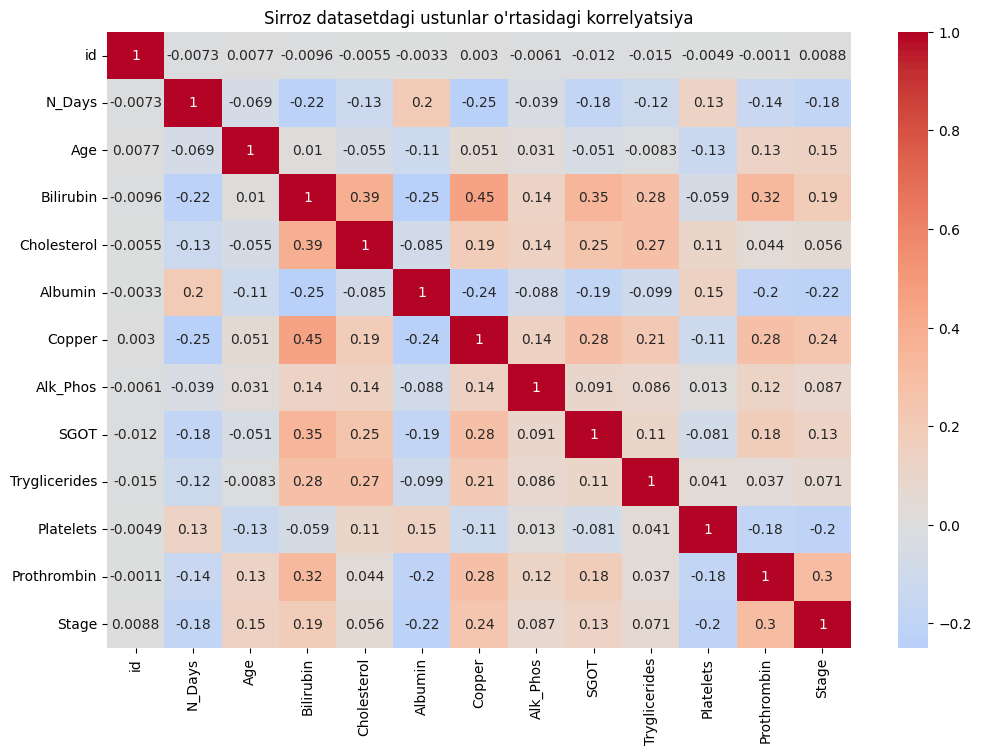

In [ ]:
numeric_df = train.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Sirroz datasetdagi ustunlar o'rtasidagi korrelyatsiya")
plt.show()

In [ ]:
train.isnull().sum()

,0
id,0
N_Days,0
Drug,6506
Age,0
Sex,0
Ascites,6498
Hepatomegaly,6508
Spiders,6509
Edema,0
Bilirubin,0


In [ ]:
train.Drug.value_counts()

,count
Drug,
D-penicillamine,4610
Placebo,3884


In [ ]:
train.Status.value_counts()

,count
Status,
C,10053
D,4565
CL,381
Y,1


In [ ]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,2178.0,D-penicillamine,16374.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,C
1,1,2644.0,D-penicillamine,17774.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,C
2,2,3069.0,Placebo,17844.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,C
3,3,2216.0,Placebo,19221.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,C
4,4,2256.0,Placebo,21600.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,D


In [ ]:
train.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
train_encoder = encoder.fit_transform(train[['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Status']])

encoded_df = pd.DataFrame(train_encoder, columns=encoder.get_feature_names_out(['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Status']))

df = pd.concat([train.drop(['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Status'], axis=1), encoded_df], axis=1)

In [ ]:
df

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Drug_nan,Sex_M,Ascites_Y,Ascites_nan,Hepatomegaly_Y,Hepatomegaly_nan,Spiders_Y,Spiders_nan,Edema_S,Edema_Y,Status_CL,Status_D,Status_Y
0,0,2178.0,16374.0,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2644.0,17774.0,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3069.0,17844.0,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2216.0,19221.0,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2256.0,21600.0,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,1783.0,23107.0,1.3,243.0,3.76,58.0,944.0,97.00,93.0,233.0,9.9,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14996,14996,3492.0,13149.0,0.7,NaN,4.03,NaN,NaN,NaN,NaN,273.0,10.3,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14997,14997,1170.0,22646.0,0.8,NaN,3.14,NaN,NaN,NaN,NaN,280.0,10.6,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14998,14998,1433.0,21828.0,0.6,280.0,4.04,52.0,843.0,28.38,189.0,334.0,10.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.drop('Status_Y', axis=1)

In [ ]:
df.head()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Drug_nan,Sex_M,Ascites_Y,Ascites_nan,Hepatomegaly_Y,Hepatomegaly_nan,Spiders_Y,Spiders_nan,Edema_S,Edema_Y,Status_CL,Status_D
0,0,2178.0,16374.0,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2644.0,17774.0,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3069.0,17844.0,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2216.0,19221.0,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,2256.0,21600.0,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


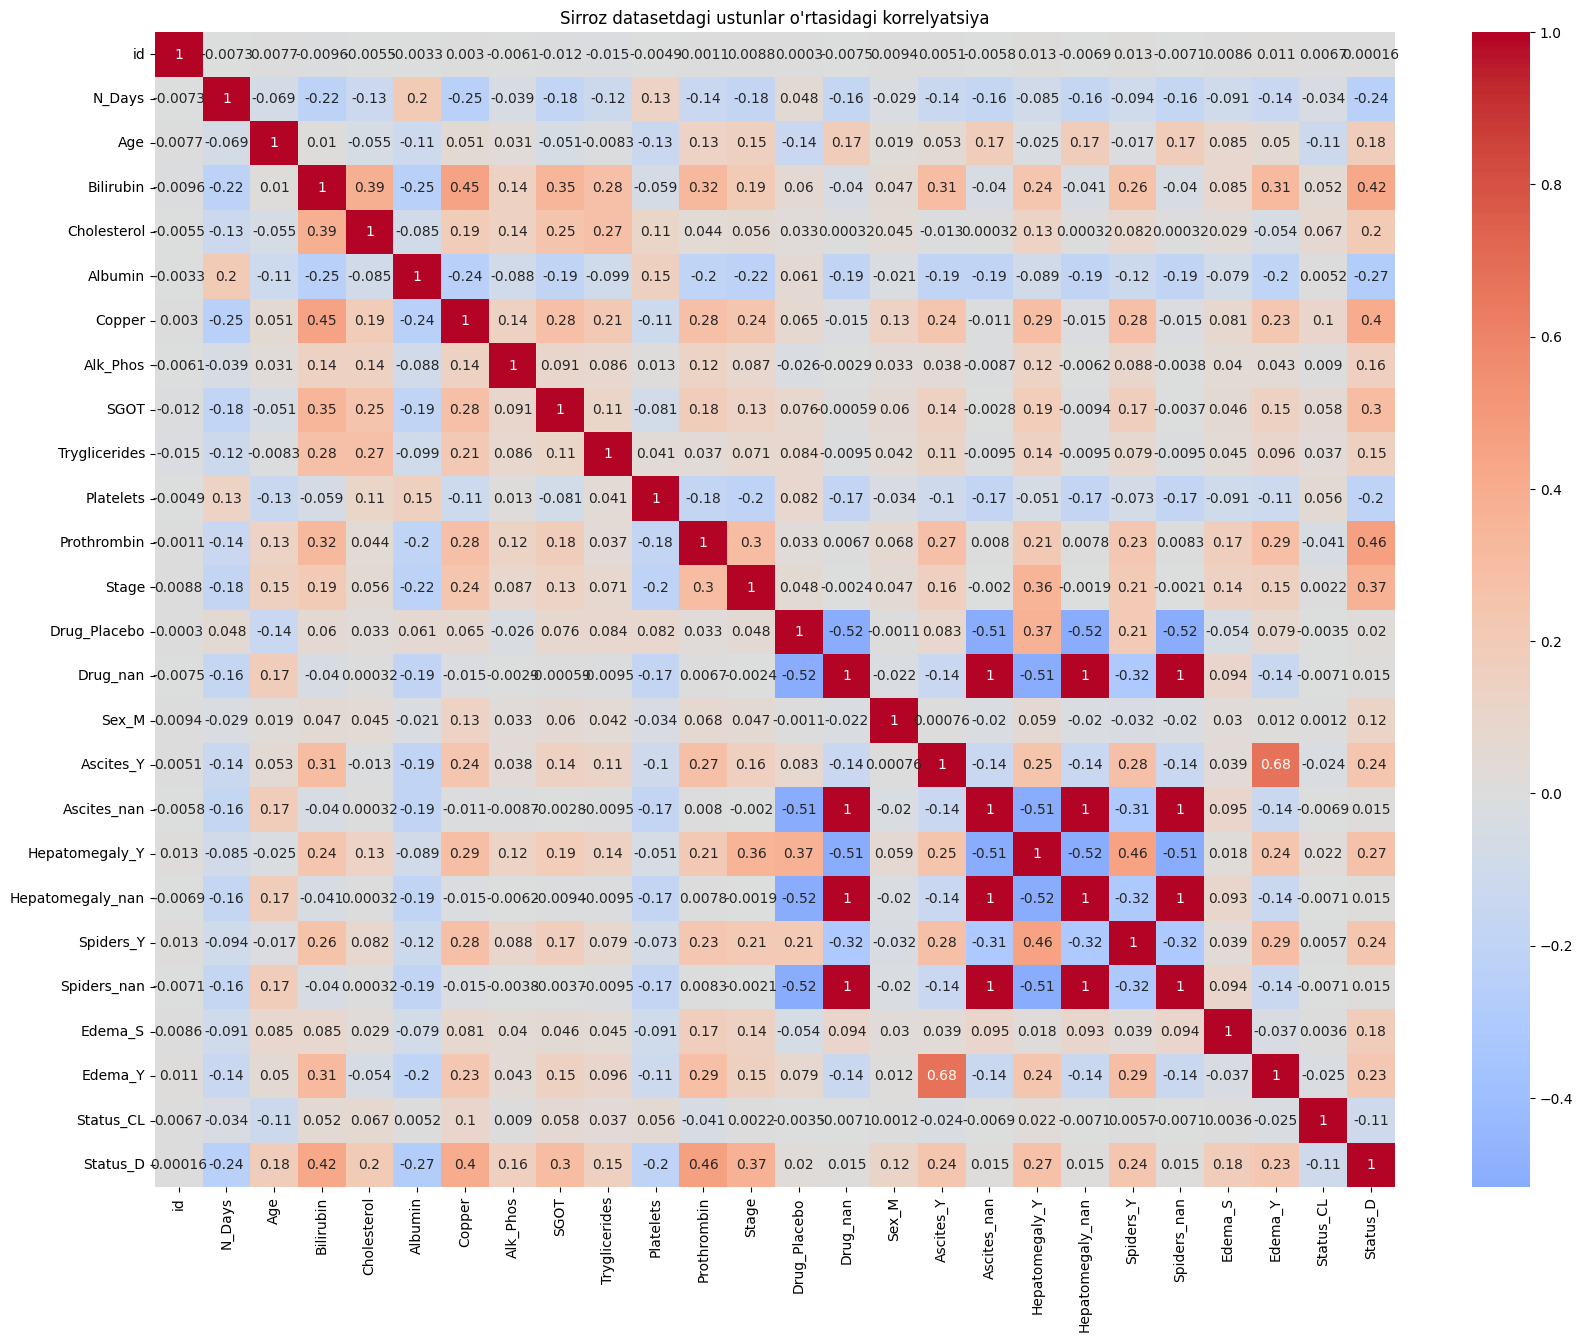

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Sirroz datasetdagi ustunlar o'rtasidagi korrelyatsiya")
plt.show()

In [ ]:
df.isnull().sum()

,0
id,0
N_Days,0
Age,0
Bilirubin,0
Cholesterol,8299
Albumin,0
Copper,6601
Alk_Phos,6512
SGOT,6514
Tryglicerides,8334


In [ ]:
df = df.drop(['Spiders_nan', 'Hepatomegaly_nan', 'Ascites_nan'], axis=1)

In [ ]:
df.sample(10)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Drug_nan,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Status_CL,Status_D
5516,5516,1770.0,11868.0,0.9,320.0,3.00,41.0,1258.0,122.45,80.0,298.0,10.3,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6566,6566,4556.0,12227.0,0.9,328.0,3.38,9.0,1112.0,71.30,95.0,288.0,9.6,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1254,1254,1235.0,21904.0,0.6,239.0,3.91,41.0,876.0,55.80,64.0,227.0,10.6,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6441,6441,1925.0,12779.0,0.7,NaN,3.87,38.0,1029.0,56.76,NaN,319.0,9.5,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6772,6772,4062.0,18993.0,0.7,NaN,3.04,NaN,NaN,NaN,NaN,418.0,11.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2155,2155,3445.0,20708.0,0.6,260.0,3.35,49.0,758.0,125.55,101.0,231.0,11.4,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6717,6717,2105.0,20600.0,1.1,233.0,3.98,173.0,1857.0,134.85,68.0,165.0,13.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7320,7320,3577.0,17180.0,0.5,226.0,4.13,36.0,1142.0,55.80,86.0,128.0,9.6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10841,10841,2318.0,19994.0,1.3,205.0,3.00,65.0,1065.0,91.00,126.0,181.0,9.8,4.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6954,6954,1443.0,14975.0,1.2,NaN,3.34,136.0,1995.0,128.00,NaN,427.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
id,0
N_Days,0
Age,0
Bilirubin,0
Cholesterol,8299
Albumin,0
Copper,6601
Alk_Phos,6512
SGOT,6514
Tryglicerides,8334


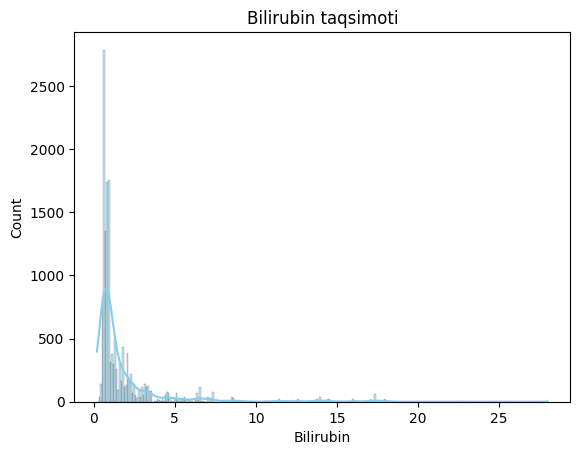

In [ ]:
sns.histplot(data=df, x='Bilirubin', kde=True, color='skyblue')
plt.title('Bilirubin taqsimoti')
plt.show()

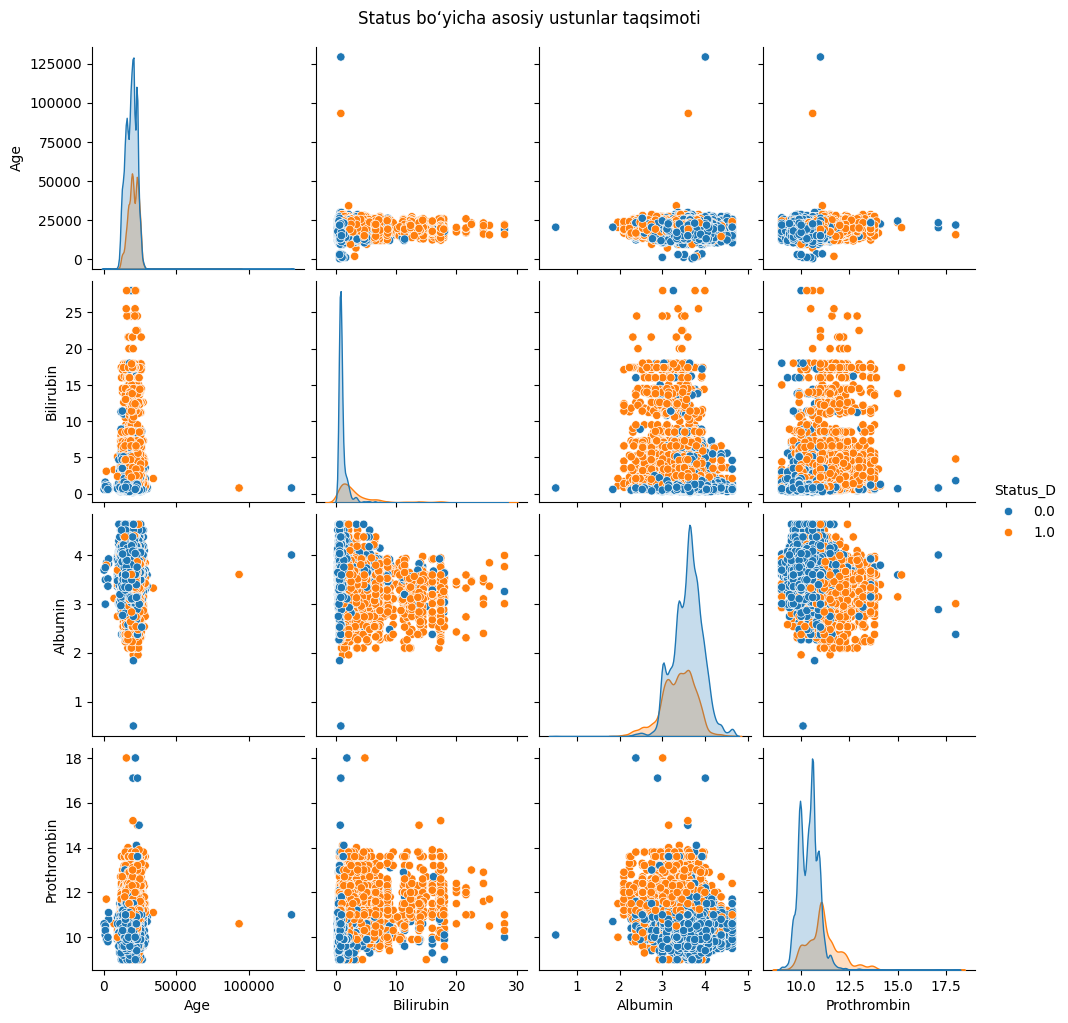

In [ ]:
sns.pairplot(df, hue='Status_D', vars=['Age', 'Bilirubin', 'Albumin', 'Prothrombin'])
plt.suptitle("Status bo‘yicha asosiy ustunlar taqsimoti", y=1.02)
plt.show()

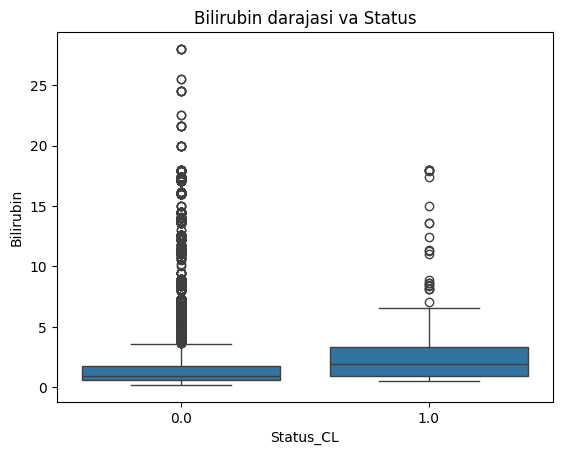

In [ ]:
sns.boxplot(data=df, x='Status_CL', y='Bilirubin')
plt.title("Bilirubin darajasi va Status")
plt.show()

/tmp/ipython-input-68-3103190209.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status_CL', palette='Set2')


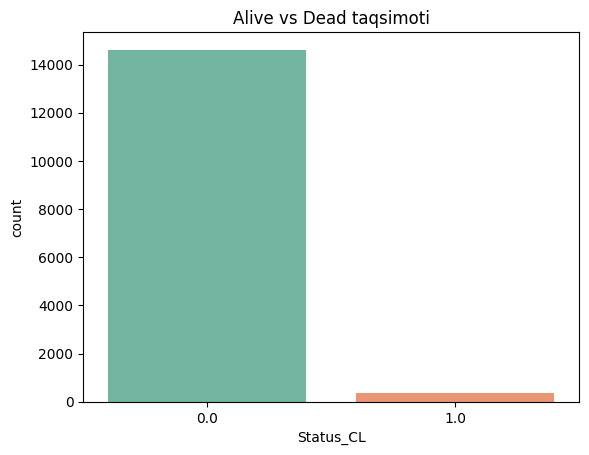

In [ ]:
sns.countplot(data=df, x='Status_CL', palette='Set2')
plt.title("Alive vs Dead taqsimoti")
plt.show()

In [ ]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,2178.0,D-penicillamine,16374.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,C
1,1,2644.0,D-penicillamine,17774.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,C
2,2,3069.0,Placebo,17844.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,C
3,3,2216.0,Placebo,19221.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,C
4,4,2256.0,Placebo,21600.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,D


In [ ]:
train.isnull().sum()

,0
id,0
N_Days,0
Drug,6506
Age,0
Sex,0
Ascites,6498
Hepatomegaly,6508
Spiders,6509
Edema,0
Bilirubin,0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:

train_cat = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']
cat_imputer = SimpleImputer(strategy='most_frequent')
train_imputer = pd.DataFrame(
    cat_imputer.fit_transform(train[train_cat]),
    columns=train_cat,
    index=train.index
    )
